# 1. Set Up

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt            # library for visualization

In [48]:
import random                              # pseudo-random number generator
from tqdm import tqdm

In [5]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK

In [6]:
# Import Convience Functions
from utils import process_tweet, class_freqs

# 2. The Data

In [7]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

## 2.1 Count

In [8]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


## 2.2 Setting The Data

In [9]:
# Make labels
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))
print(len(labels))
labels[:5]

10000


array([1., 1., 1., 1., 1.])

In [10]:
# Make Tweets
tweets = all_positive_tweets + all_negative_tweets
print(len(tweets))

10000


# 3. Transform Data

In [12]:
#Create Frequency Dictionary

frqs = class_freqs(tweets, labels)

print("Type : ", type(frqs), " & Length : ", len(frqs))

Type :  <class 'dict'>  & Length :  13173


# 4. Visualization of The Frquency 

## 4.1 Sorting The Dictionary

In [22]:

sort_freq = dict(sorted(frqs.items(), key=lambda x: x[1], reverse = True))

sort_freq

{(':(', 0.0): 4584,
 (':)', 1.0): 3691,
 (':-)', 1.0): 701,
 (':d', 1.0): 658,
 ('thank', 1.0): 643,
 (':-(', 0.0): 501,
 ('follow', 1.0): 447,
 ('love', 1.0): 401,
 ("i'm", 0.0): 343,
 ('...', 0.0): 332,
 ('miss', 0.0): 301,
 ('...', 1.0): 290,
 ('pleas', 0.0): 275,
 ('follow', 0.0): 263,
 ('day', 1.0): 246,
 ('want', 0.0): 246,
 ('u', 1.0): 245,
 ('good', 1.0): 238,
 ('like', 1.0): 233,
 ('get', 0.0): 233,
 ('like', 0.0): 228,
 ('go', 0.0): 224,
 ('happi', 1.0): 212,
 ('♛', 0.0): 210,
 ('》', 0.0): 210,
 ('get', 1.0): 209,
 ('u', 0.0): 193,
 ('see', 1.0): 186,
 ("i'm", 1.0): 183,
 ("can't", 0.0): 180,
 ('hi', 1.0): 173,
 ('great', 1.0): 172,
 ('time', 0.0): 166,
 ('back', 1.0): 163,
 ('feel', 0.0): 158,
 ('know', 1.0): 155,
 ('love', 0.0): 152,
 ('go', 1.0): 151,
 ('day', 0.0): 150,
 ('sorri', 0.0): 149,
 ('one', 0.0): 149,
 ('new', 1.0): 146,
 ('hope', 1.0): 143,
 (':p', 1.0): 139,
 ('look', 1.0): 139,
 ('much', 0.0): 139,
 ('<3', 1.0): 135,
 ('work', 0.0): 133,
 ('realli', 0.0): 133

## 4.2 Select 15 Words from each class

In [46]:
keys = []
n = 15
pos, neg = 0, 0
for pair, count in sort_freq.items():
    word = pair[0]
    cat = pair[1]
    
    if (cat == 0) & (neg < 15):
        keys.append(word)
        neg += 1
        
    elif (cat == 1) & (pos < 15):
        keys.append(word)
        pos += 1
    else:
        print("Complete, total key words : ", len(data))
        break

Complete, total key words :  60


In [47]:
keys

[':(',
 ':)',
 ':-)',
 ':d',
 'thank',
 ':-(',
 'follow',
 'love',
 "i'm",
 '...',
 'miss',
 '...',
 'pleas',
 'follow',
 'day',
 'want',
 'u',
 'good',
 'like',
 'get',
 'like',
 'go',
 'happi',
 '♛',
 '》',
 'get',
 'u',
 'see',
 "i'm",
 "can't"]

In [50]:
# Loop Through our Selected Words
data = []
for word in tqdm(keys):
    
    #Initialize positive & negative counts
    pos, neg = 0, 0
    
    if (word, 1) in sort_freq:
        pos = sort_freq[(word, 1)]
        
    if (word, 0) in sort_freq:
        neg = sort_freq[(word, 0)]
        
    data.append([word, pos, neg])

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 37560.93it/s]


In [51]:
data

[[':(', 1, 4584],
 [':)', 3691, 2],
 [':-)', 701, 0],
 [':d', 658, 0],
 ['thank', 643, 107],
 [':-(', 0, 501],
 ['follow', 447, 263],
 ['love', 401, 152],
 ["i'm", 183, 343],
 ['...', 290, 332],
 ['miss', 27, 301],
 ['...', 290, 332],
 ['pleas', 99, 275],
 ['follow', 447, 263],
 ['day', 246, 150],
 ['want', 98, 246],
 ['u', 245, 193],
 ['good', 238, 101],
 ['like', 233, 228],
 ['get', 209, 233],
 ['like', 233, 228],
 ['go', 151, 224],
 ['happi', 212, 25],
 ['♛', 0, 210],
 ['》', 0, 210],
 ['get', 209, 233],
 ['u', 245, 193],
 ['see', 186, 125],
 ["i'm", 183, 343],
 ["can't", 43, 180]]

In [58]:
# Due To the High Scale This Needs to be Transformed
# Transformation
x = np.log([x[1] + 1 for x in data])
y = np.log([x[2] + 1 for x in data])

In [69]:
plt.rcParams['font.family'] = 'DejaVu Sans'

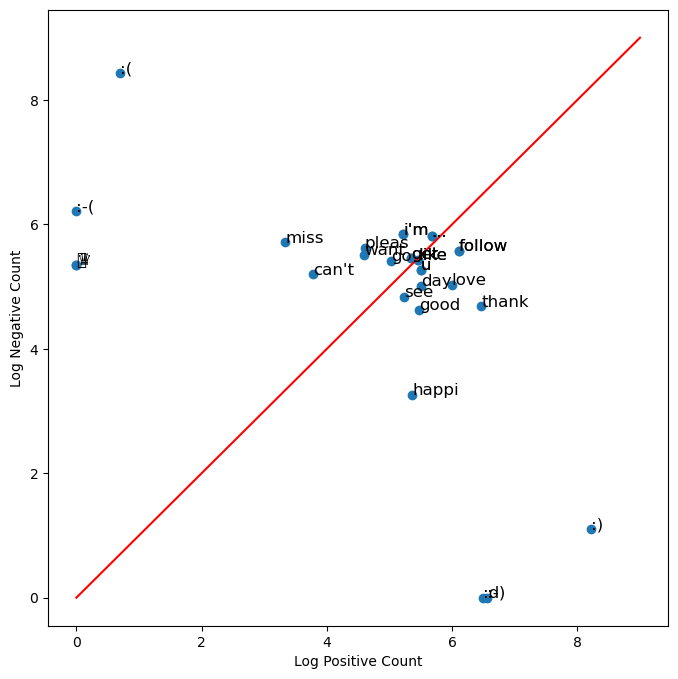

In [70]:
# Plot
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x,y)

plt.xlabel("Log Positive Count")
plt.ylabel("Log Negative Count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

In [71]:
x = np.sqrt([x[1] + 1 for x in data])
y = np.sqrt([x[2] + 1 for x in data])

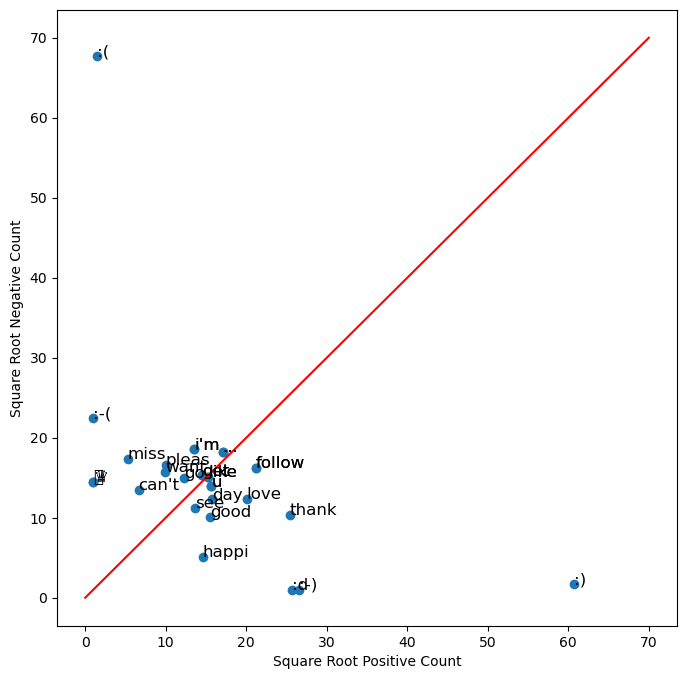

In [74]:
# Plot
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x,y)

plt.xlabel("Square Root Positive Count")
plt.ylabel("Square Root Negative Count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 70], [0, 70], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

Logarithmic Transformation Providing more information as comapred to Square Root